In [1]:
# Uncomment and run if you do not have these packages installed or are outdated
#!pip install kemlglearn --upgrade
#!pip install scikit-learn --upgrade

# Data Preprocessing: Discretization and Normalization

In [2]:
%matplotlib notebook
from sklearn import datasets
from kemlglearn.preprocessing import Discretizer
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


iris = datasets.load_iris()
col = ['r', 'g', 'b']
lc = [col[i] for i in iris['target']]

## Attributes Discretization

This is a plot of two of the attributes of the Iris dataset 

<IPython.core.display.Javascript object>


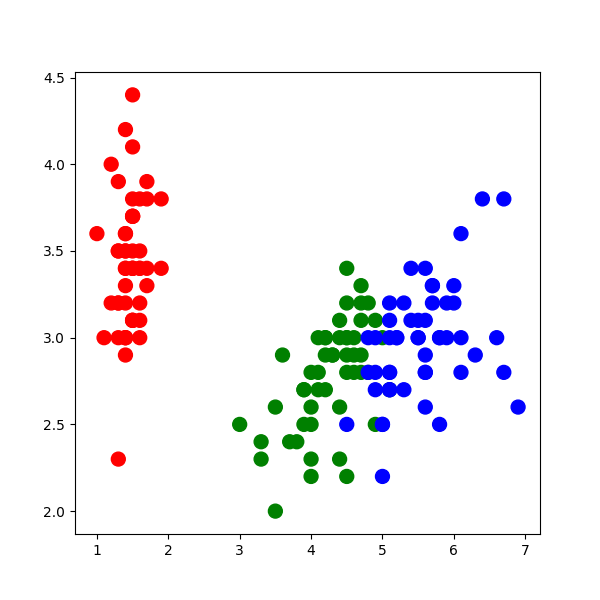

In [3]:
fig = plt.figure(figsize=(6,6))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=lc,s=100);

Now we discretize the attributes using equal bins (5 in this examples), the plot represents the 5x5 possible combinations, one combination can have many data points

In [4]:
@interact(bins = (3,9,2))
def g(bins=5):
    disc = Discretizer(bins=bins, method='equal')
    disc.fit(iris['data'])
    irisdisc = disc.transform(iris['data'], copy=True)
    fig = plt.figure(figsize=(6,6))
    plt.scatter(irisdisc[:, 2], irisdisc[:, 1], c=lc,s=100);

interactive(children=(IntSlider(value=5, description='bins', max=9, min=3, step=2), Output()), _dom_classes=('…

Using frequency distretization obtains also a 5x5 grid of combinations but the distribution of the data points changes

In [5]:
@interact(bins = (3,9,2))
def g(bins=5):
    disc = Discretizer(bins=bins, method='frequency')
    disc.fit(iris['data'])
    irisdisc = disc.transform(iris['data'], copy=True)
    fig = plt.figure(figsize=(8,8))
    plt.scatter(irisdisc[:, 2], irisdisc[:, 1], c=lc,s=100);

interactive(children=(IntSlider(value=5, description='bins', max=9, min=3, step=2), Output()), _dom_classes=('…

## Data normalization

Data normalization standardizes the attributes so their scales do not influence the comparisons, first we will use a range normalization for the iris dataset, the only difference that we can observe in the plot is the change of scale (plots already scale the ranges of the attributes to maintain a 1:1 proportion)

<IPython.core.display.Javascript object>


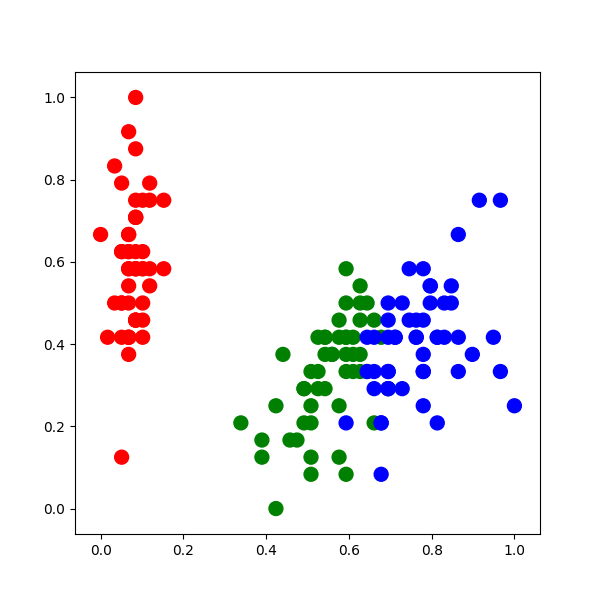

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mx = MinMaxScaler()
fdata = mx.fit_transform(iris['data'])
fig = plt.figure(figsize=(6,6))
plt.scatter(fdata[:, 2], fdata[:, 1], c=lc,s=100);

We can now use a standard score normalization assuming gaussian data, as before the only change that we can observe is the change in the scale of the axis of the plot

<IPython.core.display.Javascript object>


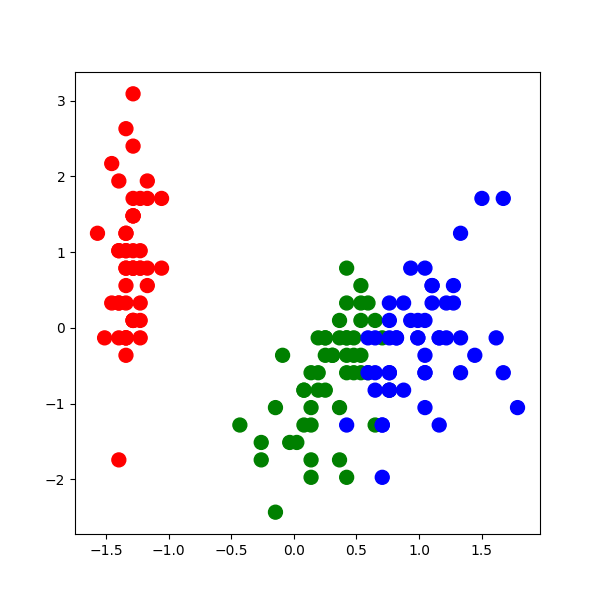

In [7]:
std = StandardScaler()
fdata = std.fit_transform(iris['data'])
fig = plt.figure(figsize=(6,6))
plt.scatter(fdata[:, 2], fdata[:, 1], c=lc,s=100);